# **Fashion Classifier**

### **Import Library**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.random import set_seed
from tensorflow.keras.backend import clear_session

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

### **Load and split data**

In [38]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### **View data**

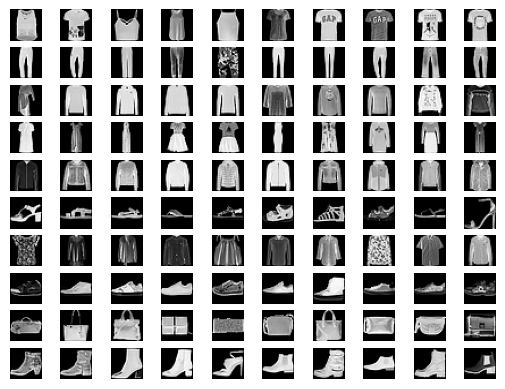

In [4]:
fig, axs = plt.subplots(10, 10)

for i in range(10):    
  for j in range(10):  
    target = np.random.choice(np.where(y_train == i)[0]) 
    axs[i][j].axis('off')
    axs[i][j].imshow(X_train[target], cmap='gray') 

In [5]:
print(X_train[1].reshape(28*28))

[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
 133  16   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49
 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0
   0   0   0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204
 202 201 201 201 209 218 224 164   0   0   0   0   0   0   0   0   0 188
 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225
  41   0   0   0   0   0   0   0  51 219 199 203 203 212 238 248 250 245
 249 246 247 252 248 235 207 203 203 222 140   0   0   0   0   0   0   0
 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202
 206 220 224   0   0   0   0   0   0   0 200 222 209 203 215 200   0  70
  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0   0   0
   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0
 215 217 214 208 220  95   0   0   0   0   0  45 226 214 214 215 224 205
   0  42  35  60  16  17  12  13  70   0 189 216 21

In [12]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
X.shape, y.shape

((70000, 28, 28), (70000,))

In [19]:
print(y[21340])

4


### **Normalization**

In [22]:
X_train = X_train.reshape(X_train.shape[0], 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28).astype('float32')
X_train /= 225.0
X_test /= 225.0

In [7]:
print(X_train[1].reshape(28*28))

[0.         0.         0.         0.         0.         0.00444444
 0.         0.         0.         0.         0.18222222 0.83555555
 0.45777777 0.24       0.21333334 0.19111112 0.38666666 0.74666667
 0.5911111  0.07111111 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00444444 0.         0.         0.         0.21777777
 0.60444444 0.97333336 0.96       1.0133333  1.0488889  1.1333333
 1.1333333  1.1333333  1.1333333  0.96444446 0.95555556 1.1288888
 1.0266666  0.7111111  0.2        0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.06222222 0.7822222  0.9866667  0.9955556  0.94222224
 0.9022222  0.88       0.8711111  0.8888889  0.95555556 0.9066667
 0.8977778  0.8933333  0.8933333  0.8933333  0.9288889  0.9688889
 0.9955556  0.72888887 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.83555555
 0.97333336 0.8888889  0.88       0.897

### **One-hot encoding**

In [23]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train_ohe = np_utils.to_categorical(y_train)
y_test_ohe = np_utils.to_categorical(y_test)

X_train.shape, y_train_ohe.shape, X_test.shape, y_test_ohe.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

### **Create & Fit Model**

In [27]:
# Convolutional Neural Network 
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               589952    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                      

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train_ohe, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test_ohe, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
300/300 - 31s - loss: 0.5032 - accuracy: 0.8210 - val_loss: 0.3756 - val_accuracy: 0.8684 - 31s/epoch - 104ms/step
Epoch 2/18
300/300 - 33s - loss: 0.3503 - accuracy: 0.8739 - val_loss: 0.3299 - val_accuracy: 0.8844 - 33s/epoch - 111ms/step
Epoch 3/18
300/300 - 31s - loss: 0.3052 - accuracy: 0.8904 - val_loss: 0.2987 - val_accuracy: 0.8914 - 31s/epoch - 103ms/step
Epoch 4/18
300/300 - 34s - loss: 0.2871 - accuracy: 0.8972 - val_loss: 0.2884 - val_accuracy: 0.8952 - 34s/epoch - 112ms/step
Epoch 5/18
300/300 - 30s - loss: 0.2621 - accuracy: 0.9049 - val_loss: 0.2796 - val_accuracy: 0.9003 - 30s/epoch - 101ms/step
Epoch 6/18
300/300 - 30s - loss: 0.2440 - accuracy: 0.9109 - val_loss: 0.2825 - val_accuracy: 0.8966 - 30s/epoch - 102ms/step
Epoch 7/18
300/300 - 31s - loss: 0.2302 - accuracy: 0.9153 - val_loss: 0.2636 - val_accuracy: 0.9055 - 31s/epoch - 104ms/step
Epoch 8/18
300/300 - 31s - loss: 0.2205 - accuracy: 0.9190 - val_loss: 0.2507 - val_accuracy: 0.9093 - 31s/epoch - 105

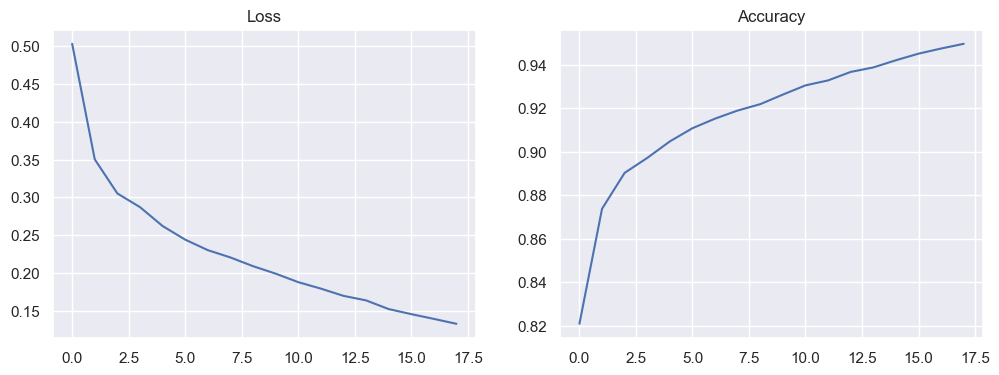

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'])

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.show()

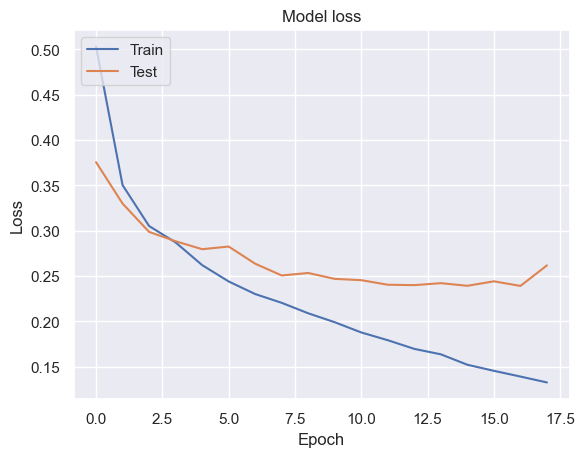

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### **Evaluate**

313/313 [==============================] - 3s 9ms/step
[9 2 1 ... 8 1 5]


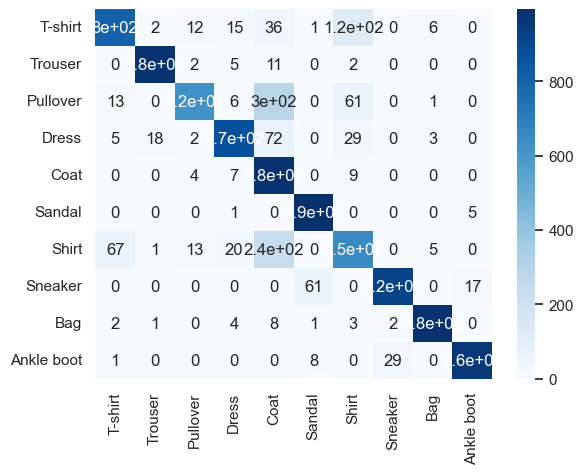

In [40]:
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis = 1)
print(y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sns.heatmap(cm, annot=True, cmap='Blues', yticklabels=labels, xticklabels=labels)
plt.show()

Random Test Images: 
1/1 [==============================] - 0s 209ms/step


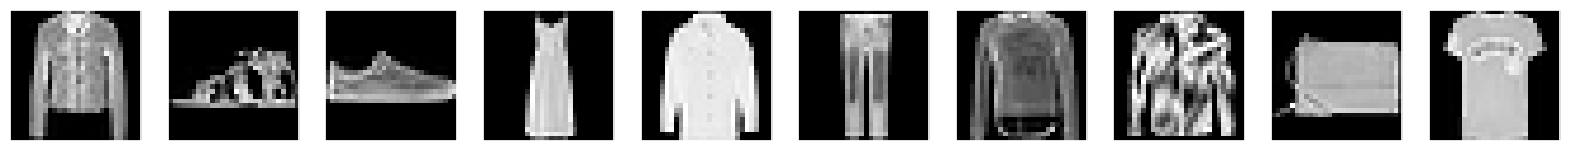

Predicted classes: Coat Sandal Sandal Dress Coat Trouser Pullover Coat Bag T-shirt 

In [31]:
# Random testing
output_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# utility function for showing images
def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

print('Random Test Images: ')
prediction = model.predict(X_test[10:20])
show_imgs(X_test[10:20])
classes_x=np.argmax(prediction,axis=1)
print('Predicted classes: ',end="")
for p in classes_x:
    print(output_labels[p],end=" ")

In [41]:
model.save('CNN_model_1.h5')

### **Standard Scaler**

In [46]:
# scale data
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

standard_scaler = MinMaxScaler()  # x_scaled = (x - x_min) / (x_max - x_min)
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [47]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
300/300 - 31s - loss: 0.1294 - accuracy: 0.9519 - val_loss: 0.2502 - val_accuracy: 0.9157 - 31s/epoch - 103ms/step
Epoch 2/18
300/300 - 30s - loss: 0.1220 - accuracy: 0.9553 - val_loss: 0.2383 - val_accuracy: 0.9173 - 30s/epoch - 101ms/step
Epoch 3/18
300/300 - 31s - loss: 0.1153 - accuracy: 0.9574 - val_loss: 0.2536 - val_accuracy: 0.9155 - 31s/epoch - 103ms/step
Epoch 4/18
300/300 - 31s - loss: 0.1100 - accuracy: 0.9588 - val_loss: 0.2527 - val_accuracy: 0.9190 - 31s/epoch - 102ms/step
Epoch 5/18
300/300 - 31s - loss: 0.1042 - accuracy: 0.9614 - val_loss: 0.2566 - val_accuracy: 0.9191 - 31s/epoch - 102ms/step
Epoch 6/18
300/300 - 30s - loss: 0.0997 - accuracy: 0.9624 - val_loss: 0.2669 - val_accuracy: 0.9179 - 30s/epoch - 101ms/step
Epoch 7/18
300/300 - 31s - loss: 0.0951 - accuracy: 0.9645 - val_loss: 0.2532 - val_accuracy: 0.9222 - 31s/epoch - 104ms/step
Epoch 8/18
300/300 - 31s - loss: 0.0915 - accuracy: 0.9656 - val_loss: 0.2653 - val_accuracy: 0.9179 - 31s/epoch - 104

In [49]:
model.save('CNN_model_2.h5')